In [1]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import main
import seaborn as sns
from mtdnetwork.statistic import utils
import pandas as pd

In [2]:
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
    scheme: simultaneous, random, alternative, None
"""
evaluation = main(start_time=0, finish_time=1000, checkpoints=[0], mtd_trigger_interval=50, scheme='random')

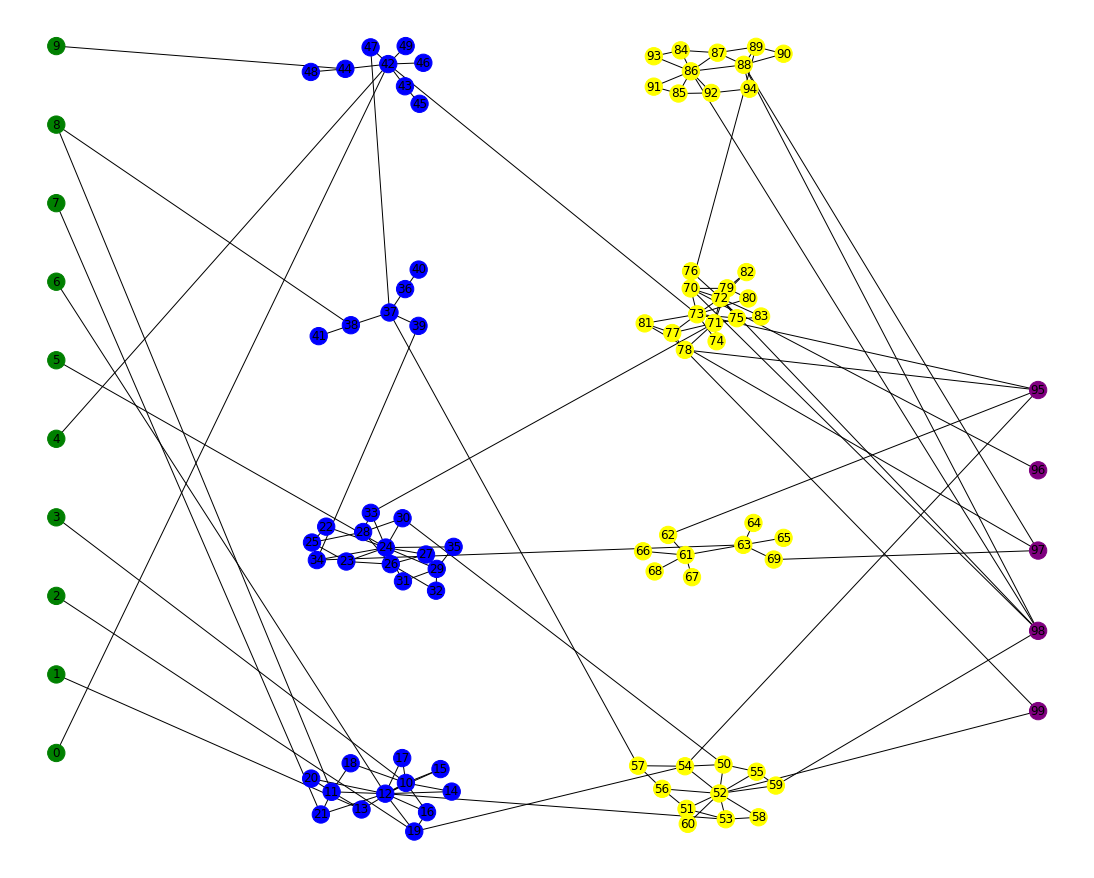

In [3]:
evaluation.get_network().draw()
plt.show()

In [4]:
# evaluation.get_network().test()

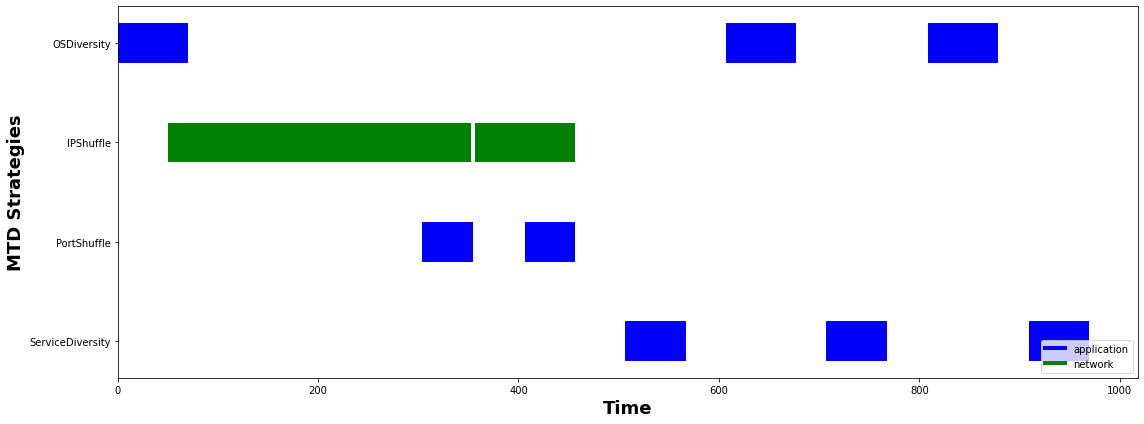

In [5]:
evaluation.visualise_mtd_operation()

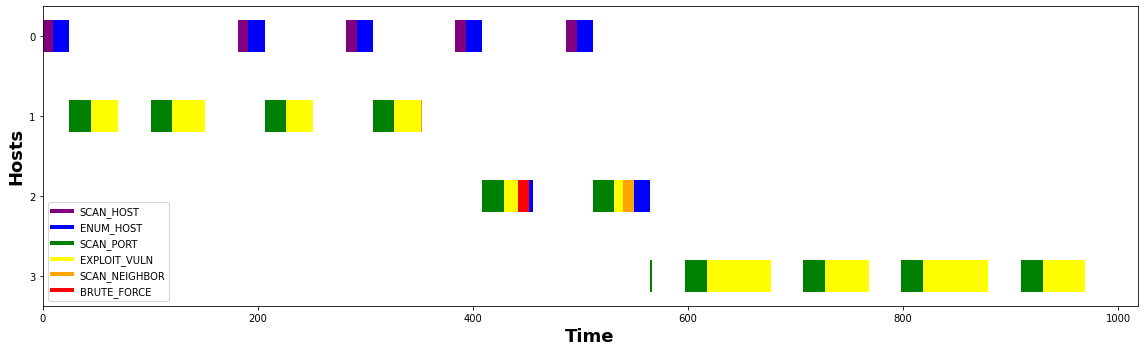

In [6]:
evaluation.visualise_attack_operation_group_by_host()

total compromised hosts:  2


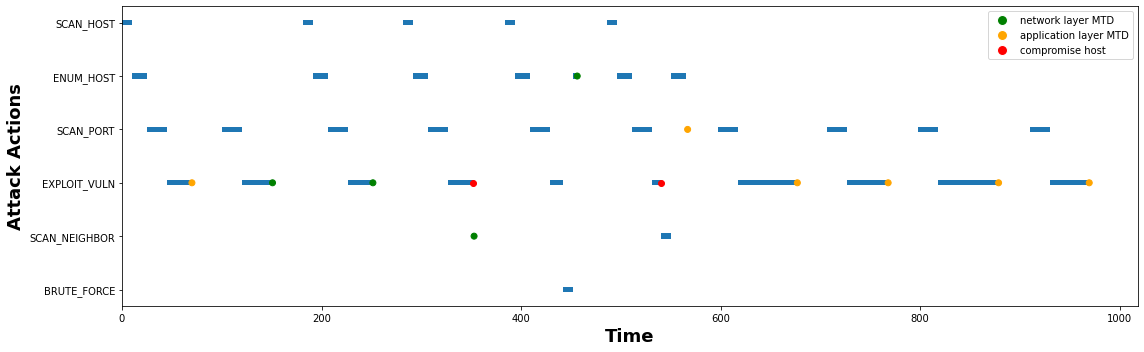

In [7]:
evaluation.visualise_attack_operation()

In [8]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [9]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token
36,EXPLOIT_VULN,350.457646,351.717244,1.259597,0,ae83e0df-f5c0-45f0-95aa-e002cf96f8bb,0,ae83e0df-f5c0-45f0-95aa-e002cf96f8bb,3,23,0,"[Tawsha, Neile, Leena, Seana, Arabelle]",None,None,yellow,1
55,EXPLOIT_VULN,538.650399,539.975012,1.324613,42,72fecfa2-109f-4de0-92d5-9a3e39f003bd,42,72fecfa2-109f-4de0-92d5-9a3e39f003bd,2,33,1,"[Tracy, Annette, Helen-Elizabeth, Mireille, Su...",None,None,yellow,2


In [10]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_uuid,compromise_host,compromise_host_uuid,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_users,interrupted_in,interrupted_by,color,curr_host_token


In [11]:
evaluation.mean_time_to_compromise()

269.8958670753735

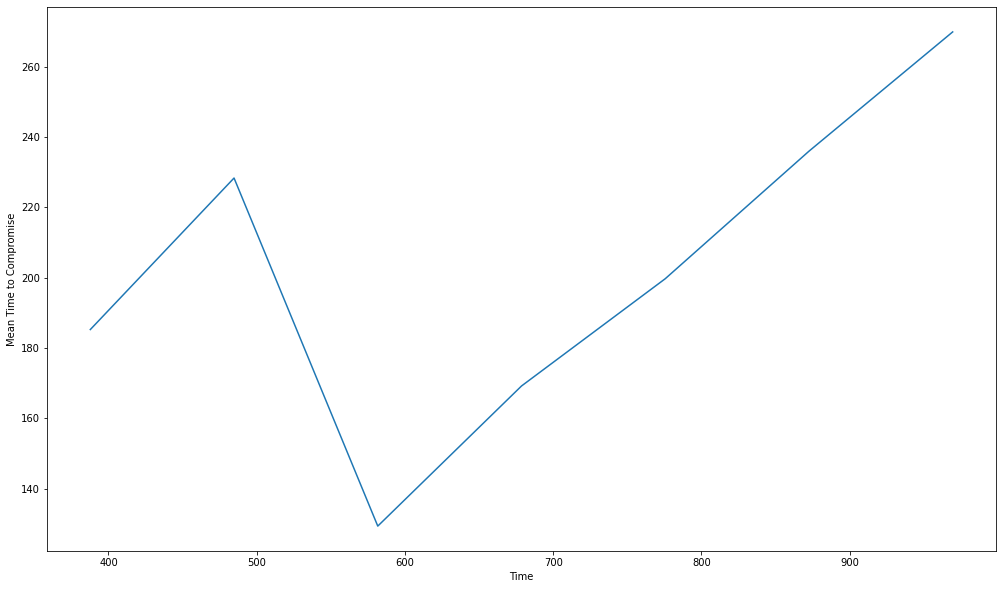

In [12]:
mttc = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp())
plt.figure(figsize=(17, 10))
sns.lineplot(data=mttc, x='Time', y='Mean Time to Compromise', markers=True, dashes=False)
plt.show()

In [13]:
evaluation.mtd_execution_frequency()

0.012378369437484157

In [14]:
evaluation.attack_success_rate()

0.18181818181818182